In [1]:
#import the necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import missingno as mn
import plotly.express as ps
import plotly.graph_objects as go

In [2]:
#load the data
data=pd.read_csv("/content/Crop_recommendation.csv")
data.head()

N     P     K  temperature   humidity        ph     rainfall label
0  90.0  42.0  43.0    20.879744  82.002744  6.502985  202.9355362  rice
1  85.0  58.0  41.0    21.770462  80.319644  7.038096  226.6555374  rice
2  60.0  55.0  44.0    23.004459  82.320763  7.840207  263.9642476  rice
3  74.0  35.0  40.0    26.491096  80.158363  6.980401  242.8640342  rice
4  78.0  42.0  42.0    20.130175  81.604873  7.628473  262.7173405  rice

In [3]:
#dimensions of data
data.shape

(2200, 8)

In [4]:
#dataframe info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2183 non-null   float64
 1   P            2176 non-null   float64
 2   K            2185 non-null   float64
 3   temperature  2184 non-null   float64
 4   humidity     2183 non-null   float64
 5   ph           2177 non-null   float64
 6   rainfall     2180 non-null   object 
 7   label        2189 non-null   object 
dtypes: float64(6), object(2)
memory usage: 137.6+ KB


In [5]:
#checking for null values in initial dataset
print(data.isna().sum())

N              17
P              24
K              15
temperature    16
humidity       17
ph             23
rainfall       20
label          11
dtype: int64


In [6]:
from sklearn.impute import SimpleImputer
frequent_val=SimpleImputer(missing_values=np.nan,strategy='most_frequent')
#replacing all of the missing data with the most frequent value

# Instantiate SimpleImputer with strategy='most_frequent'
frequent_imputer = SimpleImputer(strategy='most_frequent')

# Columns to be imputed
columns_to_impute = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label']

# Impute missing values
data[columns_to_impute] = frequent_imputer.fit_transform(data[columns_to_impute])
data.head()

N     P     K temperature   humidity        ph     rainfall label
0  90.0  42.0  43.0   20.879744  82.002744  6.502985  202.9355362  rice
1  85.0  58.0  41.0   21.770462  80.319644  7.038096  226.6555374  rice
2  60.0  55.0  44.0   23.004459  82.320763  7.840207  263.9642476  rice
3  74.0  35.0  40.0   26.491096  80.158363  6.980401  242.8640342  rice
4  78.0  42.0  42.0   20.130175  81.604873  7.628473  262.7173405  rice

In [7]:
# Summary statistics
print(data.describe())


             N       P       K  temperature    humidity           ph rainfall  \
count   2200.0  2200.0  2200.0  2200.000000  2200.00000  2200.000000     2200   
unique   137.0   117.0    73.0  2184.000000  2183.00000  2177.000000     2179   
top       40.0    60.0    17.0     8.825675    14.25804     3.504752        ]   
freq      61.0    80.0   104.0    17.000000    18.00000    24.000000       22   

        label  
count    2200  
unique     22  
top     apple  
freq      111  


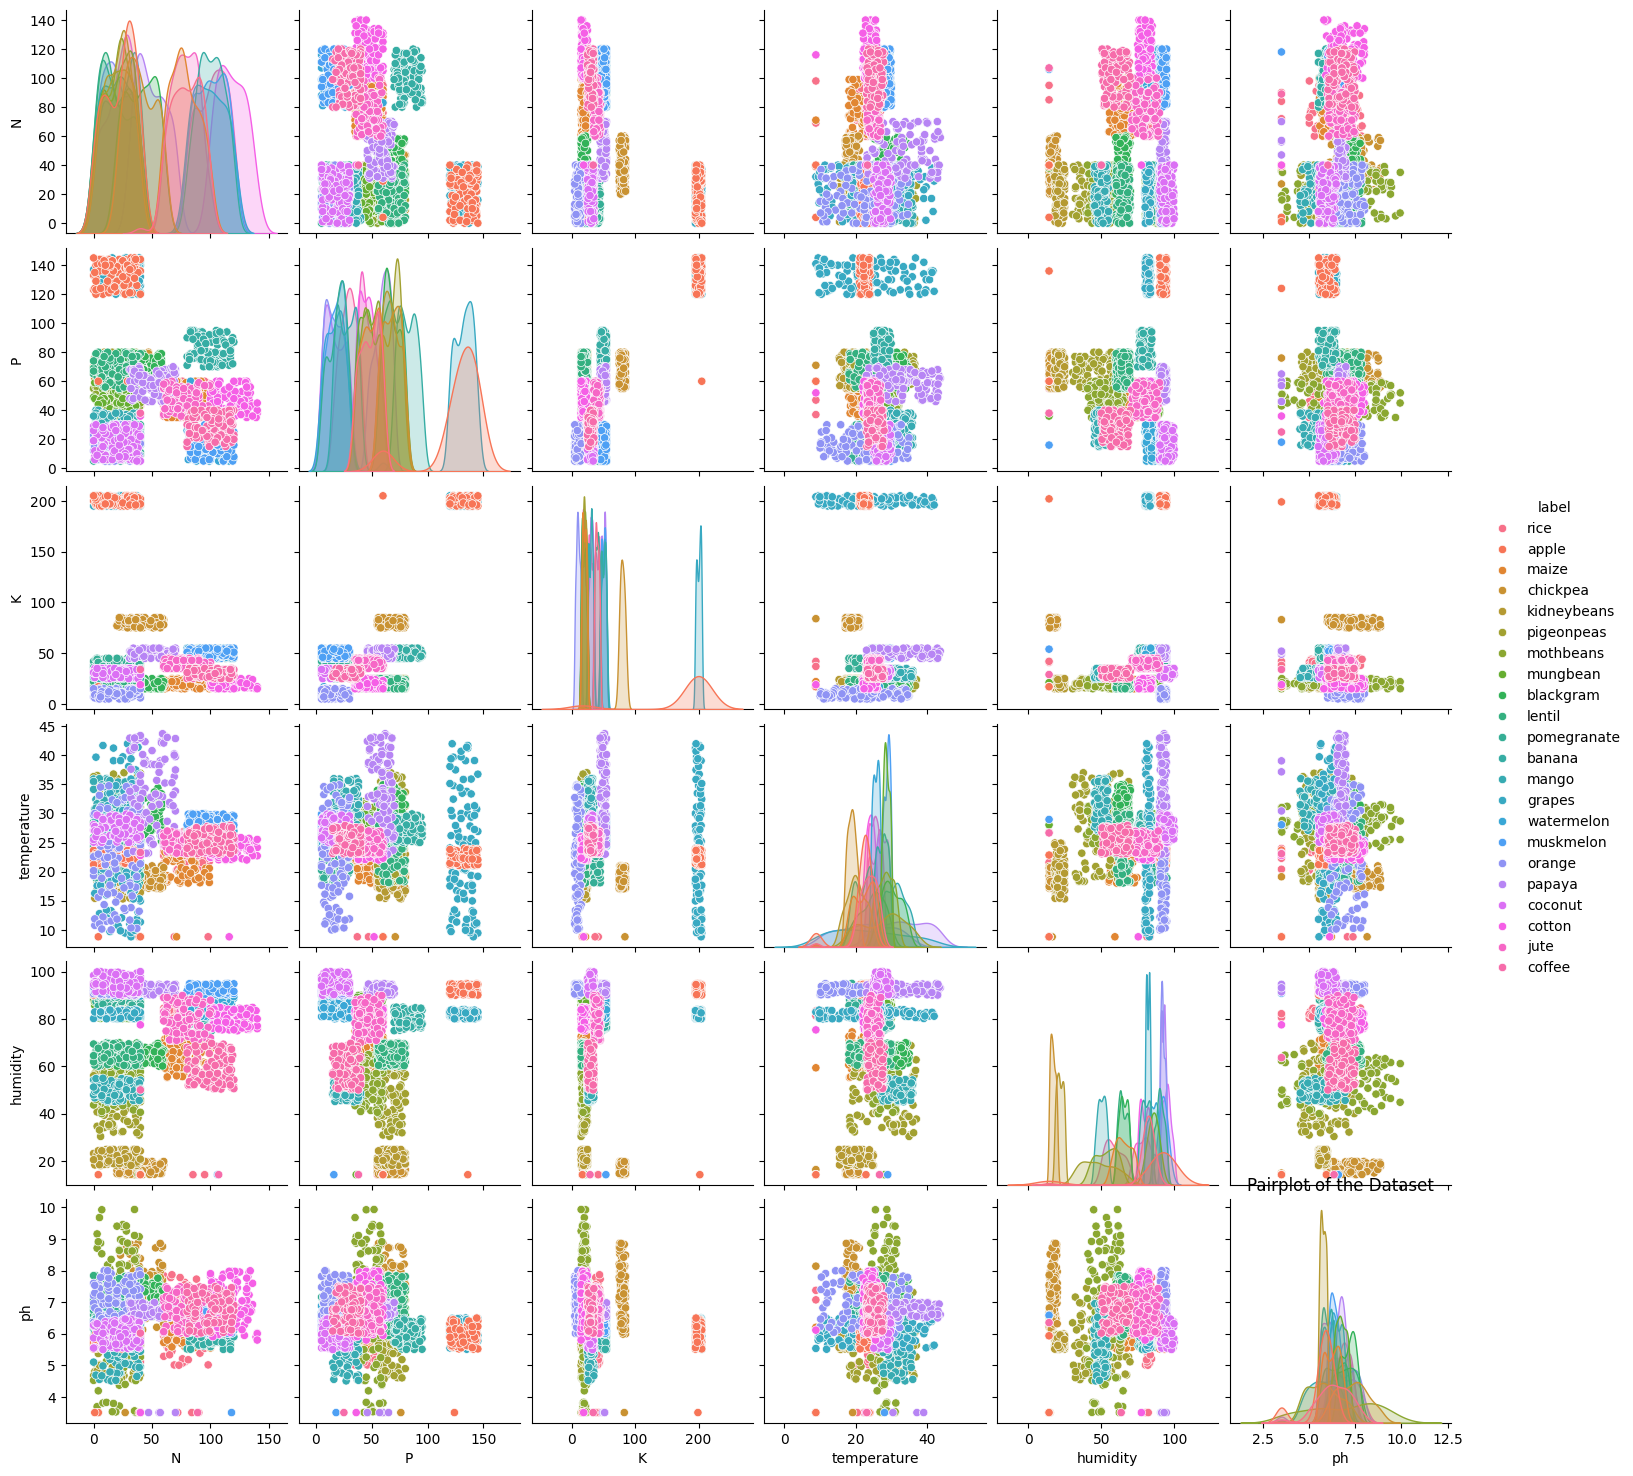

In [8]:
# Scatterplots between pairs of features
sns.pairplot(data, hue='label')
plt.title("Pairplot of the Dataset")
plt.show()

<ipython-input-14-42344e2caba7>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")


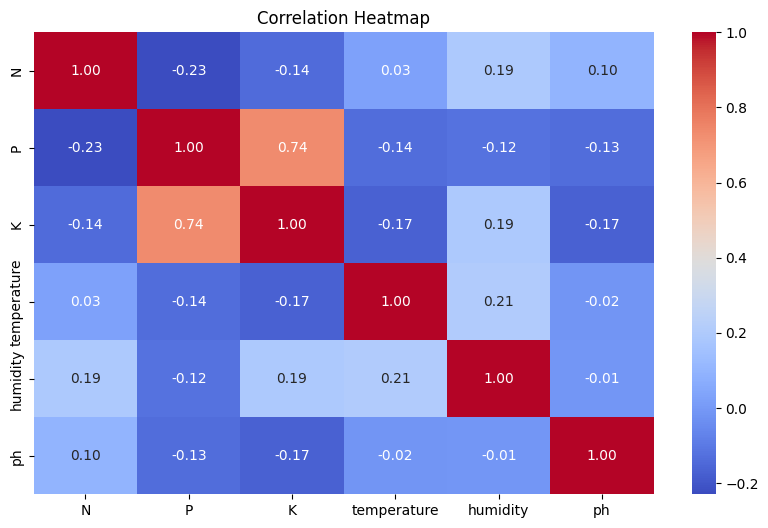

In [14]:
# Generate the correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


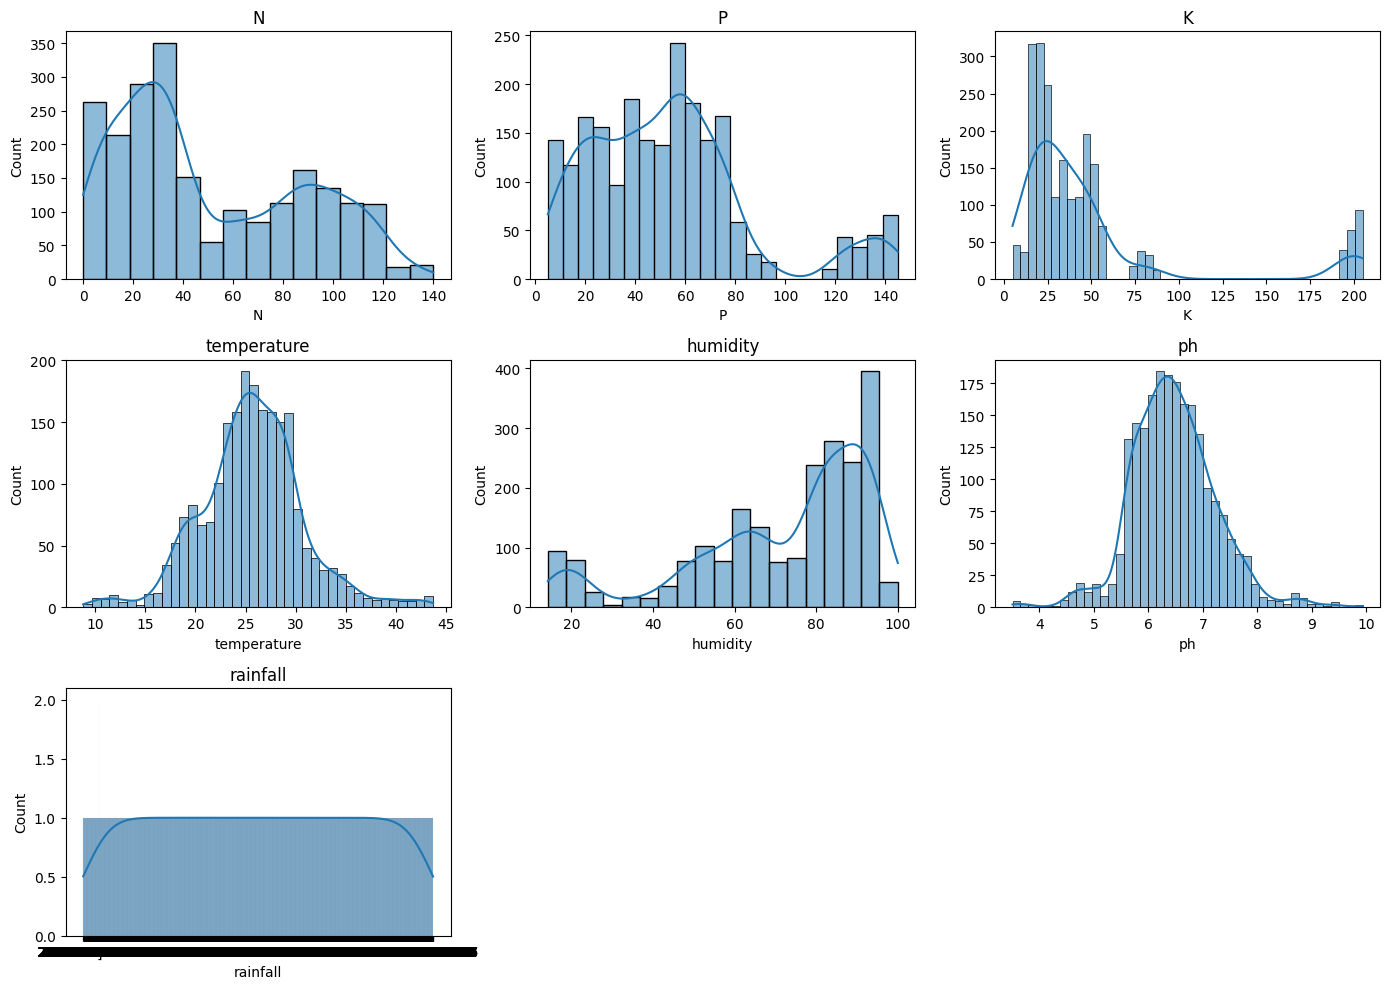

In [15]:
# Histograms for each feature
plt.figure(figsize=(14, 10))
for i, col in enumerate(data.columns[:-1]):
    plt.subplot(3, 3, i + 1)
    sns.histplot(data[col], kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()

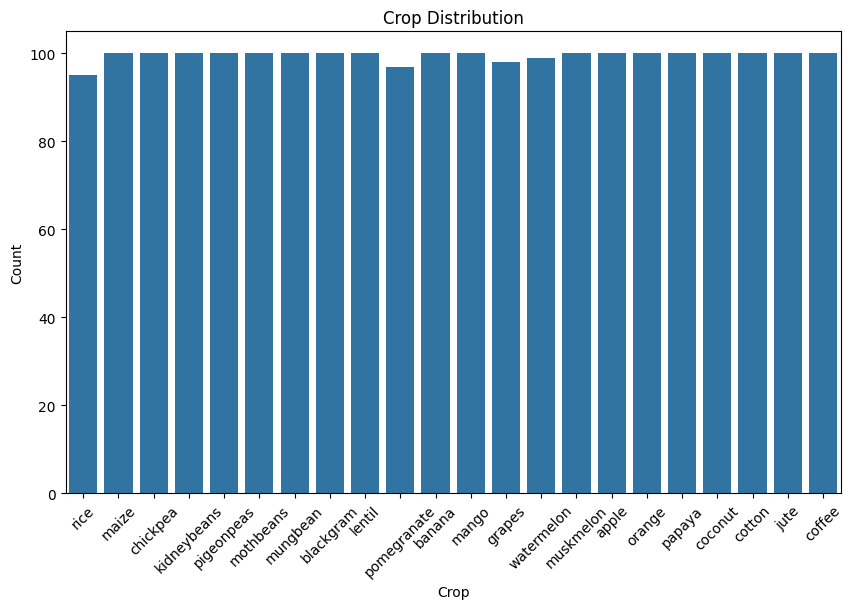

In [16]:
# Bar plot of crop distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='label', data=data)
plt.title("Crop Distribution")
plt.xlabel("Crop")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

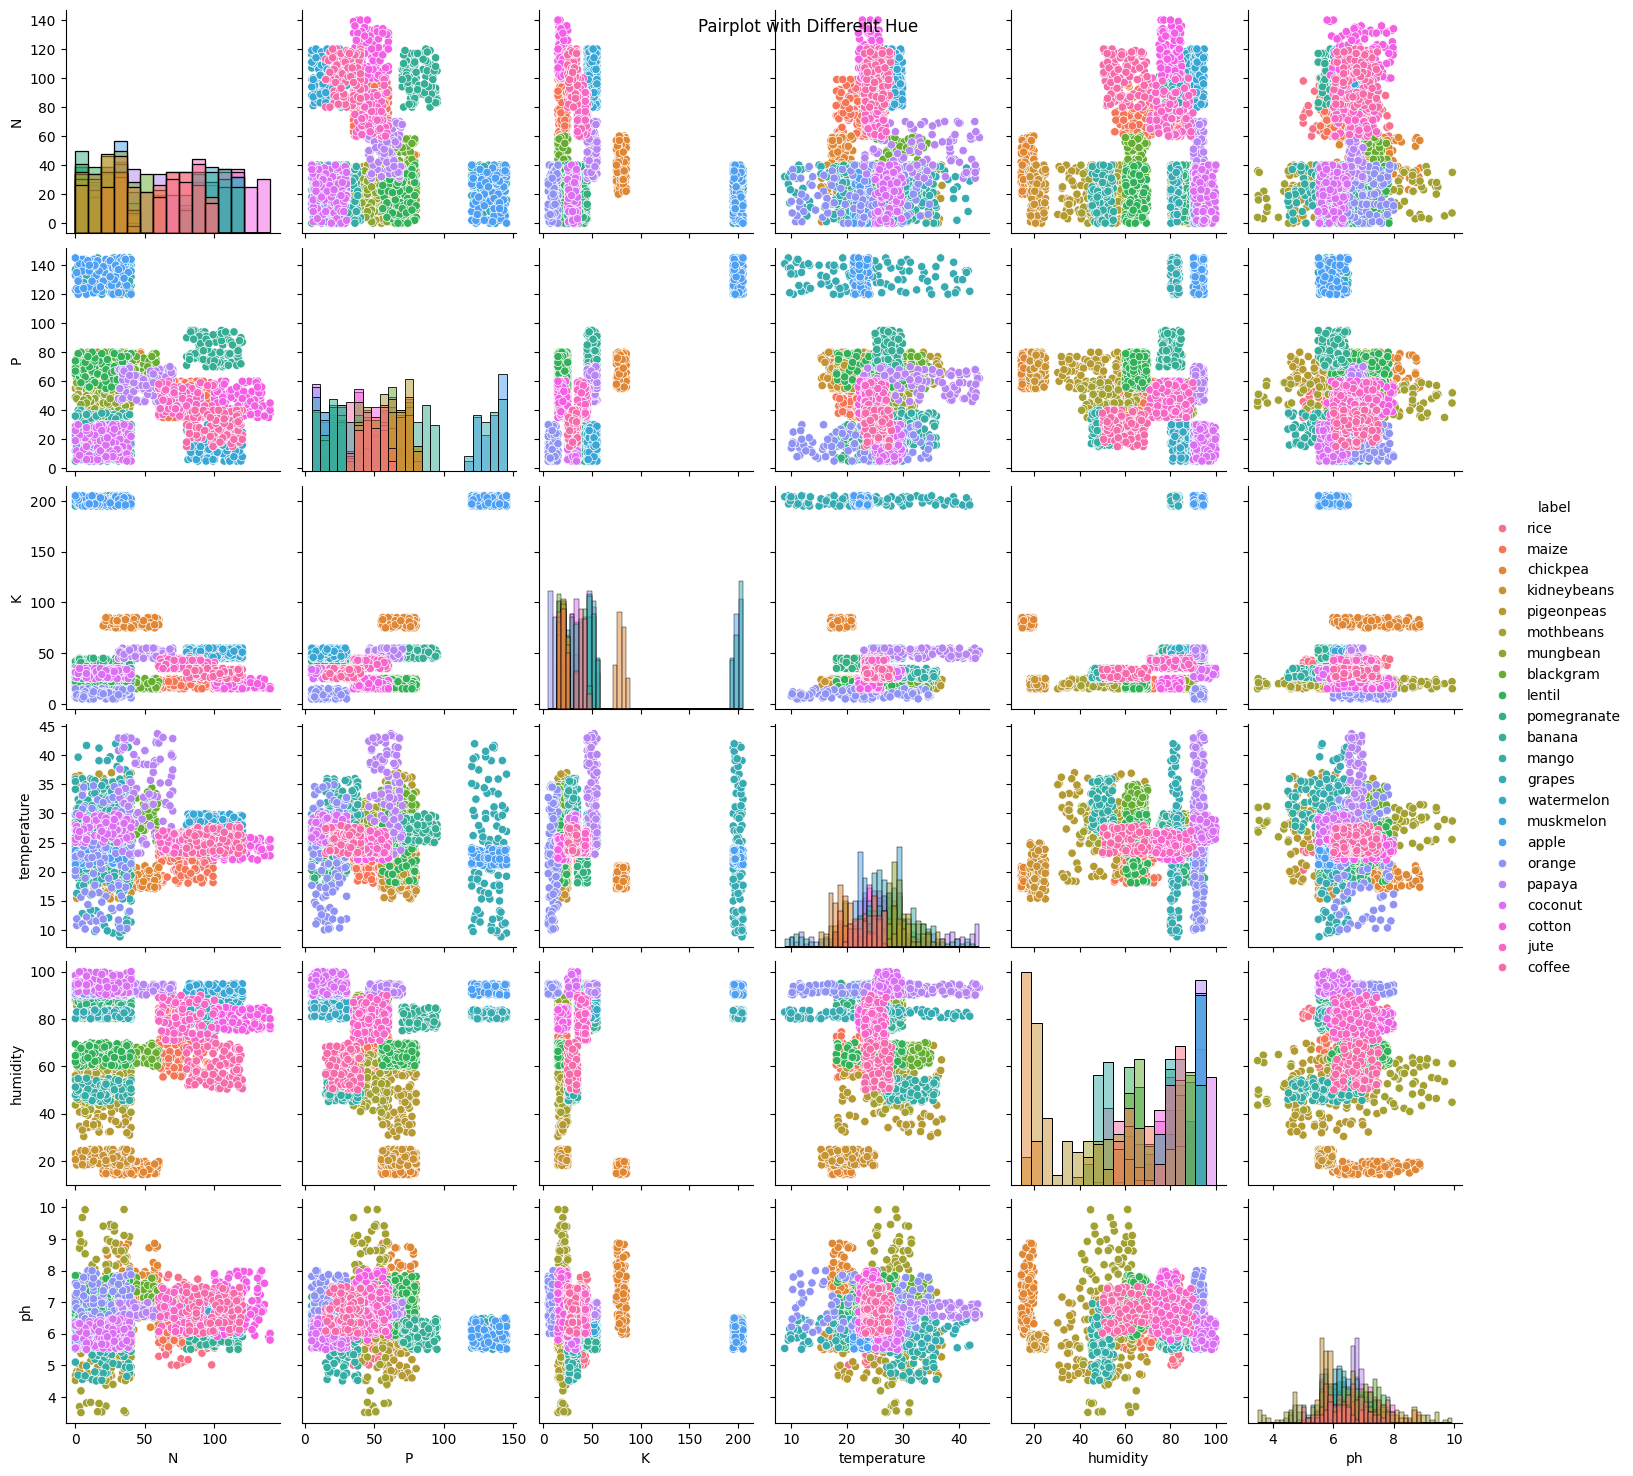

In [17]:
# Pairplot with different hue
sns.pairplot(data, hue='label', diag_kind='hist')
plt.suptitle("Pairplot with Different Hue")
plt.show()

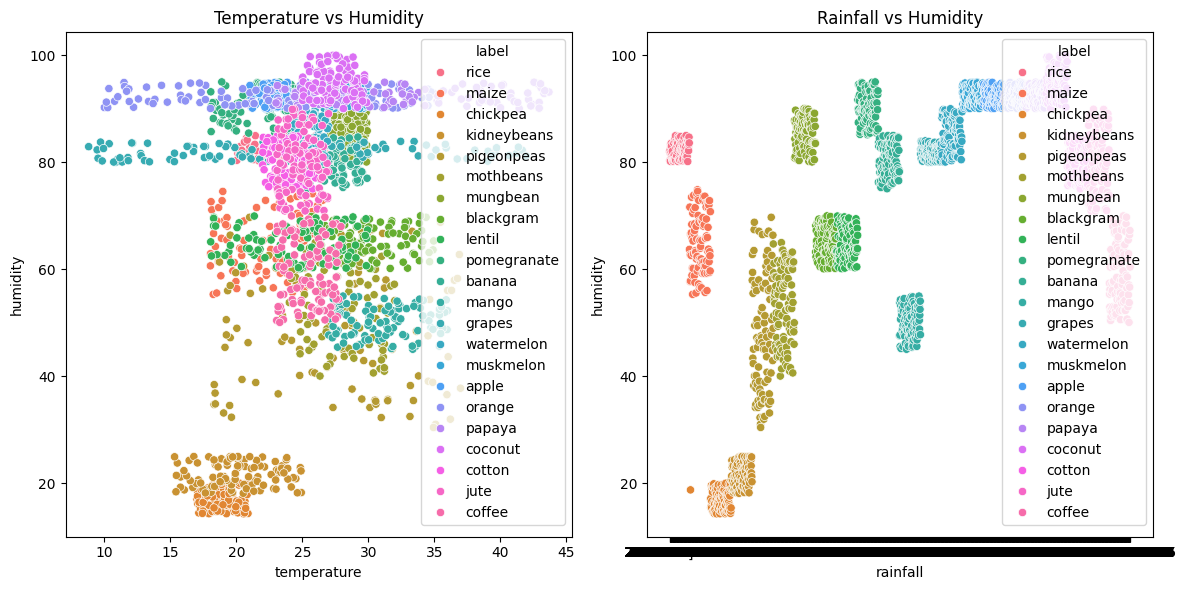

In [18]:
# Scatter plots
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(x='temperature', y='humidity', data=data, hue='label')
plt.title("Temperature vs Humidity")

plt.subplot(1, 2, 2)
sns.scatterplot(x='rainfall', y='humidity', data=data, hue='label')
plt.title("Rainfall vs Humidity")
plt.tight_layout()
plt.show()

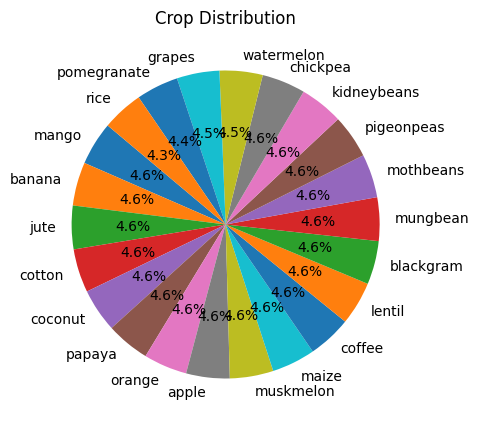

In [19]:
# Pie chart
crop_distribution = data['label'].value_counts()
plt.figure(figsize=(5, 5))
plt.pie(crop_distribution, labels=crop_distribution.index, autopct='%1.1f%%', startangle=140)
plt.title("Crop Distribution")
plt.show()

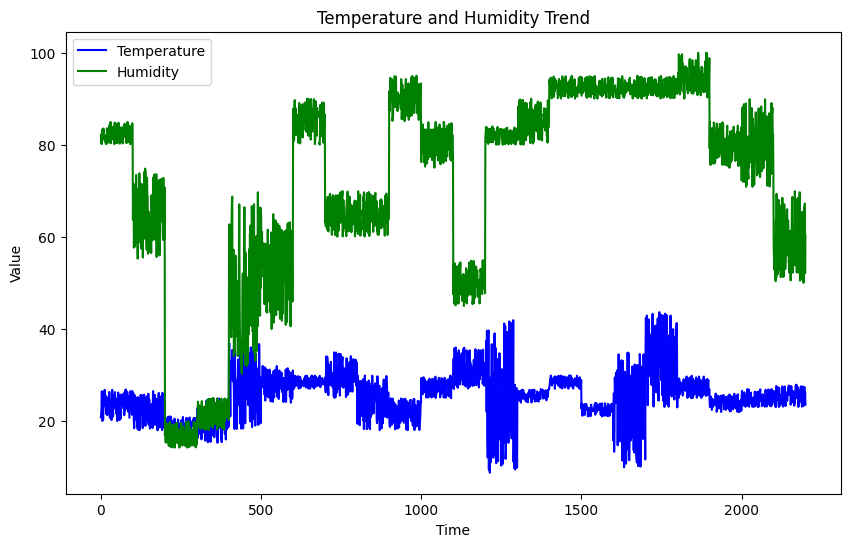

In [20]:
# Line graph (assuming there's a time-related variable in the dataset)
plt.figure(figsize=(10, 6))
plt.plot(data['temperature'], label='Temperature', color='blue')
plt.plot(data['humidity'], label='Humidity', color='green')
plt.title("Temperature and Humidity Trend")
plt.xlabel("Time")
plt.ylabel("Value")
plt.legend()
plt.show()